# Визуализация кривых обучения при разных batch_size в ходе обучения модели wordchar2vector

In [67]:
from __future__ import print_function
import random
import codecs
import itertools
import os
import numpy as np
import pandas as pd
import math
from scipy import stats
import matplotlib.pyplot as plt
from utils.tokenizer import Tokenizer
%matplotlib inline

### Списки файлов с историей обучения, сохраненных тренером модели

In [68]:
# сами файлы лежат в ../tmp
fn_1000 = ['learning_curve__lstm(cnn)_vecsize=56_tunable_char_embeddings=0_chardims=87_batchsize=1000_seed=123456.csv',
           'learning_curve__lstm(cnn)_vecsize=56_tunable_char_embeddings=0_chardims=87_batchsize=1000_seed=234567.csv']

fn_200 = ['learning_curve__lstm(cnn)_vecsize=56_tunable_char_embeddings=0_chardims=87_batchsize=200_seed=123456.csv',
          'learning_curve__lstm(cnn)_vecsize=56_tunable_char_embeddings=0_chardims=87_batchsize=200_seed=234567.csv']

fn_100 = ['learning_curve__lstm(cnn)_vecsize=56_tunable_char_embeddings=0_chardims=87_batchsize=100_seed=123456.csv']

### Получаем среднее, дисперсию и "абсолютную ошибку измерения"

In [69]:
def calc_curve( dataframe_fnames ):
    """
    Усреднение кривых обучения, загружаемых из csv-файлов в списке.
    """
    # Коэф. Стьюдента для данного кол-ва кривых при дов. вероятности 0.95
    t = stats.t.ppf(1-0.025, len(dataframe_fnames))

    # Получим среднее и дисперсию для кривых обучения в заданном наборе
    # датафреймов
    nbx = 1000000
    ox = []
    for fn in dataframe_fnames:
        df = pd.read_csv(os.path.join(u'../tmp', fn), header=None, encoding='utf-8', delimiter='\t', index_col=None)
        x = df[0].values
        if len(x) < nbx:
            nbx = len(x)
            ox = x

    v = np.zeros( (nbx, len(dataframe_fnames)) )
    for i, fn in enumerate(dataframe_fnames):
        df = pd.read_csv(os.path.join(u'../tmp', fn), header=None, encoding='utf-8', delimiter='\t', index_col=None)
        v[:, i] = df[1].values[:nbx]

    mean = np.mean(v, axis=1)
    std = np.std(v, axis=1)
    dev = std * t /math.sqrt(len(dataframe_fnames))

    return (ox, mean, std, dev)

In [70]:
ox_1000, mean_1000, std_1000, dev_1000 = calc_curve(fn_1000)
ox_200, mean_200, std_200, dev_200 = calc_curve(fn_200)

<Container object of 3 artists>

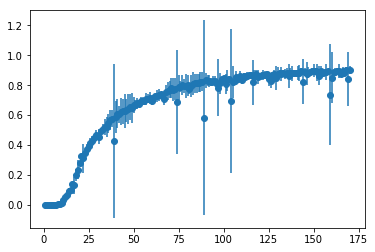

In [71]:
plt.errorbar(ox_200, mean_200, yerr=dev_200, fmt='o')

# Рисуем усредненные кривые обучения

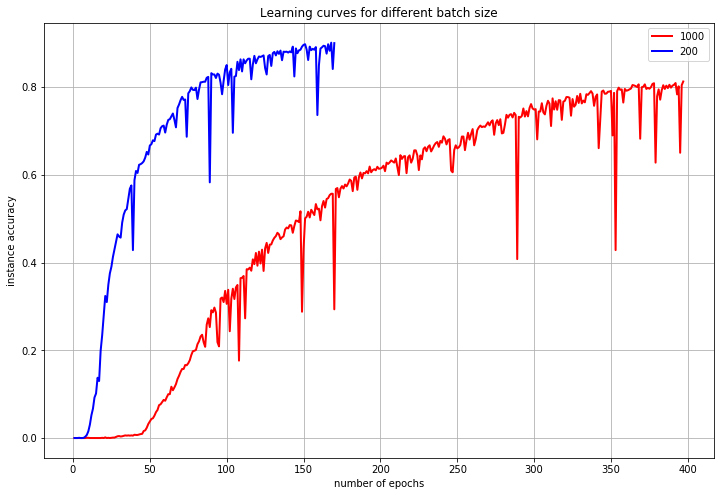

In [72]:
plt.figure(figsize=(12, 8))
plt.grid(True)
plt.plot(ox_1000, mean_1000, 'r-', linewidth=2, label='1000')
plt.plot(ox_200, mean_200, 'b-', linewidth=2, label='200')
plt.xlabel('number of epochs')
plt.ylabel('instance accuracy')
plt.title('Learning curves for different batch size')
plt.legend()